In [2]:
import torch 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import collections
import os,sys


import torch.utils as utils
import torch.optim as optim
import torch.nn as nn


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix




### Data Loader

In [3]:
fraud_data = pd.read_csv('creditcard.csv')
#split train set and test set
y= fraud_data["Class"]
X = fraud_data.loc[:, fraud_data.columns != 'Class']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=1/6, random_state=42)
X_train.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
187149,127409.0,2.187964,-1.370372,-1.864928,-2.672086,-0.509079,-0.366244,-0.582434,-0.066411,1.441711,...,-0.652992,-0.241110,0.224188,-0.062167,0.239444,0.517558,-0.567574,0.055018,-0.067086,15.59
95337,65261.0,1.266063,-0.321886,-0.613943,-1.503460,0.087634,-0.528524,0.264502,-0.256147,1.135663,...,0.061637,-0.028175,0.164298,-0.296747,-0.654741,0.882647,0.168259,0.001271,0.000599,51.00
35692,38224.0,-1.353619,-1.202668,1.713576,0.093124,-2.273097,0.502389,1.560159,0.008188,0.234176,...,1.241343,0.261270,-0.067896,1.143998,0.413205,-0.244483,1.403725,-0.153808,0.138793,527.72
140432,83717.0,-0.883135,0.814777,1.813012,-0.142903,-0.366119,0.647925,0.123649,0.308118,0.291747,...,-0.379059,0.273216,0.530944,-0.134144,-0.360406,-0.244728,-0.572042,-0.445721,-0.003260,47.97
76959,56815.0,-3.366044,-1.664284,1.410575,0.352969,4.006003,-3.154920,-0.326832,-0.691135,0.036648,...,-0.696302,-0.316395,-0.162570,-1.035747,0.357930,0.735078,-0.625134,-0.267771,-0.122046,1.00


### Data Merge

In [4]:
#trainset = train_transation.merge(train_identity, how='left', left_index=True,right_index=True)
#testset = test_transation.merge(test_identity, how='left', left_index=True,right_index=True)

In [5]:
#mapping =  [{idx: i} for idx, i in enumerate(trainset)]
#print(mapping)

In [6]:
#mapping =  [{idx: i} for idx, i in enumerate(testset)]
#print(mapping)

In [7]:
#testset

In [8]:
#test_label = testset['isFraud']
#testset = testset.drop(columns=['isFraud'],axis=1)

In [9]:
#category_list = list(range(3,12)) + [14,15] + list(range(45,54)) + list(range(404,433))
#category_list = list(range(3,12)) + [14,15] + list(range(45,54))
#data = DataInit(trainset, testset,cat_list = category_list ,dropping_list=[1])

In [10]:
#data.target_x

### Data Conversion

In [11]:
#print(data.train_x.shape)
#print(data.train_y.shape)

In [12]:
from sklearn.model_selection import train_test_split

#def data_processing(x, y, train_size = 0.7):
    # train/development split
    #train_x, validation_x, train_y, validation_y = train_test_split(x,y, train_size= train_size)
    
    # pandas2numpy2pytorch
    #train_x = torch.tensor(train_x.values).float()
    #train_y = torch.tensor(train_y.values.reshape(-1,1)).float()
    
    #valid_x = torch.tensor(validation_x.values).float()
    #valid_y = torch.tensor(validation_y.values.reshape(-1,1)).float()

    #train = torch.utils.data.TensorDataset(train_x,train_y)
    #valid = (valid_x,valid_y)
    
    #return train, valid


X_train = torch.tensor(X_train.values).float()
y_train = torch.tensor(y_train.values).float()
X_test = torch.tensor(X_test.values).float()
y_test = torch.tensor(y_test.values).float()
train = torch.utils.data.TensorDataset(X_train,y_train)
valid = (X_test,y_test)

dataset = (train,valid)

## Feature Engineering

Sort the features by their importance and select the top-k features as our DL model input 

In [13]:
from sklearn.ensemble import RandomForestRegressor 

In [14]:
rf_regressor = RandomForestRegressor(max_samples=1000, max_features=30, max_depth=10)
rf_regressor.fit(X, y)


RandomForestRegressor(max_depth=10, max_features=30, max_samples=1000)

In [15]:
[1,2,3,4]
features = X.columns[:30]
importances = rf_regressor.feature_importances_[:30]
print(features,importances)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object') [0.01489497 0.00856414 0.01282051 0.01282051 0.0378963  0.0074765
 0.         0.02028844 0.01495512 0.04838478 0.082248   0.11439992
 0.1045404  0.0048109  0.10270429 0.01121154 0.0500877  0.23545427
 0.03846154 0.00856396 0.01166668 0.01602563 0.00806362 0.00689578
 0.00481733 0.00106729 0.         0.01043514 0.0049879  0.00545683]


### Visualization

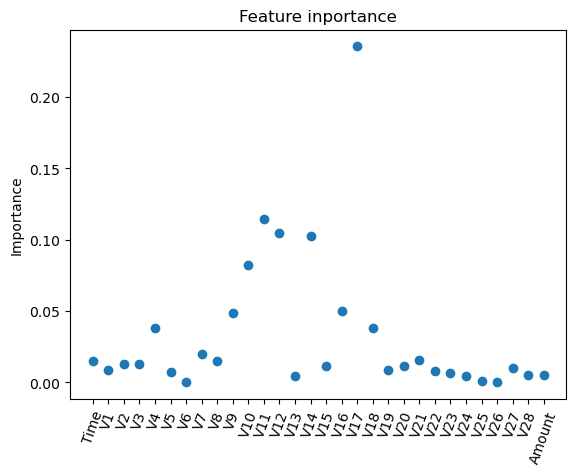

In [16]:
plt.title('Feature inportance')
plt.scatter(features,importances)
plt.ylabel('Importance')
plt.tick_params(axis='x', rotation=70)
plt.show()

### Baseline implementation

### Bayesian NN

In [17]:
!pip install blitz

In [18]:
pip install git+https://github.com/peustr/bayesian-torch.git@main


  Cloning https://github.com/peustr/bayesian-torch.git (to revision main) to /private/var/folders/j8/v25xgh1j6djfh4mr2vyf734h0000gq/T/pip-req-build-5ll3l13g
  Running command git clone --filter=blob:none --quiet https://github.com/peustr/bayesian-torch.git /private/var/folders/j8/v25xgh1j6djfh4mr2vyf734h0000gq/T/pip-req-build-5ll3l13g
  Resolved https://github.com/peustr/bayesian-torch.git to commit d030107fd5854f0b0a82a1ea67ff4986f7e564e0
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [9]:

import btorch.bnn as bnn

In [37]:
class Bayesian_nn(nn.Module):
    def __init__(self):
        super(Bayesian_nn,self).__init__()
        self.block1 = nn.Sequential(
            bnn.Conv2d(1,8,8,1),
            nn.MaxPool1d(kernel_size= 4),
            nn.BatchNorm1d(8),
            nn.ReLU()
        )
        self.fc = nn.Linear()
        
        
    def forward(self, x):
        #x = x.view(x.shape[0],-1)
        
        output_bock1 = self.block1(x)
        output_conv2 = self.conv2(output_bock1)
        output_fc = self.fc(output_conv2)
        
        output = nn.Sigmoid(x)
        return output

### MLP

In [17]:
#Multilayer perceptron neural network technique for fraud detection
#2 layers
class MLPNN(nn.Module):
    def __init__(self, input_dim):
        super(MLPNN,self).__init__()
        self.layer1=nn.Linear(input_dim, 718) 
        self.layer2=nn.Linear(718, 1)
    
    def forward(self, x):
        x = self.layer1(x)
        output = self.layer2(x)
        output = torch.sigmoid(output)
        return output
        

In [ ]:
### my model

In [19]:
# nn: Linear(fully-connected layer)- 2D
# Function: unsequeeze(2D->3D, last D for expanding) 
# nn: LSTM
# Function: Droupout
# nn: Transformer
# Function: multi-head attention //  (head = 4)
# function: Batch norm


class Mymodel(nn.Module):
    def __init__(self, input_dim):
        # model structure
        
        super(Mymodel,self).__init__()
        self.layer1=nn.Linear(input_dim, 512)
        self.layer2=nn.LSTM(512,512,2,dropout=0.5)
        self.layer3=nn.TransformerEncoderLayer(d_model=512, nhead=4)
        self.layer4=nn.Linear(512,1)
    def forward(self,x):
        
        output1 = self.layer1(x)
        output_unsqueeze = torch.unsqueeze(output1,1)
        output_LSTM = self.layer2(output_unsqueeze)
        output_TF = self.layer3(output_LSTM[0])                      
        output = torch.squeeze(output_TF)
        output= self.layer4(output)
        output=torch.sigmoid(output)
        output=output.squeeze(-1)
        #logits
        return output

### Model Training



In [20]:
def training(data, model, lr, bz, max_epoch):
    model.train()
    loss_fc = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(),lr = lr)
    
    trainset = utils.data.DataLoader(data[0], batch_size = bz, shuffle = True)
    
    for epoch in range(max_epoch):
        iteration = 0
        acc_list = []
        loss_list = []
        for step, batch in enumerate(trainset):
            iteration +=1  
            
            x, y  = batch
            y_pred = model(x)
            prediction = torch.where(y_pred > 0.5,torch.ones_like(y_pred), torch.zeros_like(y_pred))
            acc = accuracy_score(y.detach().numpy(),prediction.detach().numpy())
            loss = loss_fc(y_pred, y)
            loss_list.append(loss.detach().numpy())
            acc_list.append(acc)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #print('Epoch: ', epoch, 'Iteration: ', iteration, 'Loss: ', loss.item(), 'Accuracy: ', acc)
        total_loss = np.array(loss_list).sum()/iteration
        total_acc = np.array(acc_list).sum()/iteration
        print('Epoch: ',epoch,  'Loss: ', total_loss.item(), 'Accuracy: ', total_acc)
        evaluation(data[1],model)
    return total_acc, total_loss

In [23]:
my_model = Mymodel(len(X.columns))
#bayesian=Bayesian_nn()
acc, loss = training(data = dataset, model =my_model, lr = 0.001, max_epoch=4, bz=64 )

Epoch:  0 Loss:  0.013516580103927946 Accuracy:  0.9981421879212726
evaluation on the validation set...
0.9983146540827504
Epoch:  1 Loss:  0.013078496731912135 Accuracy:  0.9982643569695335
evaluation on the validation set...
0.9983146540827504
Epoch:  2 Loss:  0.012991639088671559 Accuracy:  0.9982643569695335
evaluation on the validation set...
0.9983146540827504
Epoch:  3 Loss:  0.012926155680689602 Accuracy:  0.9982643569695335
evaluation on the validation set...
0.9983146540827504


### Model Evalution

In [22]:
def evaluation(data, model):
    model.eval()
    
    x,y = data
    y_pred =  model(x)
    prediction = torch.where(y_pred > 0.5,torch.ones_like(y_pred), torch.zeros_like(y_pred))
    acc = accuracy_score(y.detach().numpy(),prediction.detach().numpy())
    print('evaluation on the validation set...')
    print(acc)
    

In [24]:
my_model.eval()
x,y = valid
y_pred = my_model(x)
prediction = torch.where(y_pred > 0.5,torch.ones_like(y_pred), torch.zeros_like(y_pred))
conf_matrix = confusion_matrix(y.detach().numpy(), prediction.detach().numpy())
# Extract values from confusion matrix
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

# Calculate recall
recall = true_positives / (true_positives + false_negatives)

print("Confusion Matrix:")
print(conf_matrix)
print("Recall:", recall)

Confusion Matrix:
[[47388     0]
 [   80     0]]
Recall: 0.0
